In [73]:
from simulation import *
from aesthetics import *

import glob
import os as os
import re as re
import pandas as pd

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [36]:
from plot import *

In [3]:
this = Simulation(data_source='adk_md_data')
this.name = 'chi2THR175'
this.load = True
this.load_slope = 1
this.simulate()

/media/dslochower/data-beta/projects/nonequilibrium-manuscript/simulation.py:244: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


In [4]:
concentrations = [10**i for i in np.arange(-6, 6, 0.1)]
directional_flux, reciprocating_flux, velocity = return_fluxes_and_velocity('adk_md_data', 'chi2THR175', concentrations)

100%|██████████| 120/120 [00:01<00:00, 72.49it/s]


In [5]:
hiv_10 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-10.pickle')
hiv_200 = pd.read_pickle('hiv-concentration-scan-catalytic-rate-200.pickle')

In [6]:
concentrations, hiv_10_directional_flux_above_1 = find_above_threshold(hiv_10, 'Directional flux', 1)
concentrations, hiv_10_directional_flux_above_10 = find_above_threshold(hiv_10, 'Directional flux', 10)
concentrations, hiv_200_directional_flux_above_1 = find_above_threshold(hiv_200, 'Directional flux', 1)
concentrations, hiv_200_directional_flux_above_10 = find_above_threshold(hiv_200, 'Directional flux', 10)

concentrations, hiv_10_reciprocating_flux_above_1 = find_above_threshold(hiv_10, 'Driven flux', 1)
concentrations, hiv_10_reciprocating_flux_above_10 = find_above_threshold(hiv_10, 'Driven flux', 10)
concentrations, hiv_200_reciprocating_flux_above_1 = find_above_threshold(hiv_200, 'Driven flux', 1)
concentrations, hiv_200_reciprocating_flux_above_10 = find_above_threshold(hiv_200, 'Driven flux', 10)


100%|██████████| 60/60 [00:00<00:00, 394.43it/s]


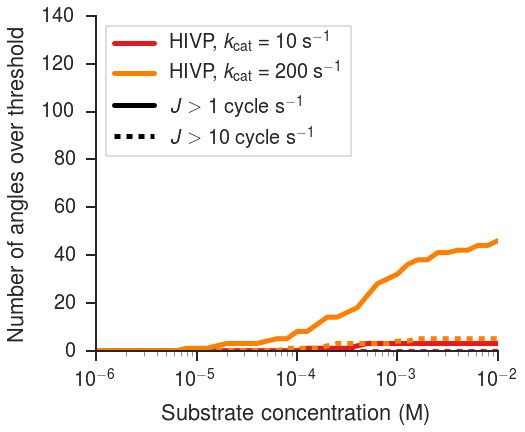

In [8]:
plot_flux_over_threshold(concentrations, [hiv_10_directional_flux_above_1,
                                         hiv_10_directional_flux_above_10,
                                         hiv_200_directional_flux_above_1,
                                         hiv_200_directional_flux_above_10], 
                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J > 1$ cycle s$^{{-1}}$', r'$J > 10$ cycle s$^{{-1}}$'],
                        ymax=140)

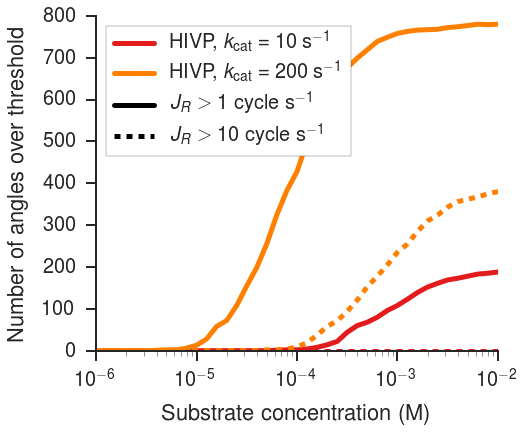

In [9]:
plot_flux_over_threshold(concentrations, [hiv_10_reciprocating_flux_above_1,
                                         hiv_10_reciprocating_flux_above_10,
                                         hiv_200_reciprocating_flux_above_1,
                                         hiv_200_reciprocating_flux_above_10], 
                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J_R > 1$ cycle s$^{{-1}}$', r'$J_R > 10$ cycle s$^{{-1}}$'],
                        ymax=800)

In [12]:
adk_10 = pd.read_pickle('adk-low-catalytic-rate-10.pickle')
adk_312 = pd.read_pickle('adk-concentration-scan.pickle')

concentrations, hiv_10_directional_flux_above_1 = find_above_threshold(hiv_10, 'Directional flux', 1)
concentrations, hiv_200_directional_flux_above_1 = find_above_threshold(hiv_200, 'Directional flux', 1)

concentrations, adk_10_directional_flux_above_1 = find_above_threshold(adk_10, 'Directional flux', 1)
concentrations, adk_312_directional_flux_above_1 = find_above_threshold(adk_312, 'Directional flux', 1)

100%|██████████| 60/60 [00:00<00:00, 286.62it/s]


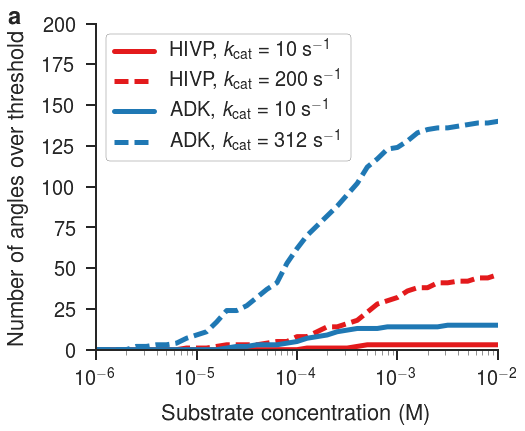

In [109]:
plot_flux_over_threshold(concentrations, [hiv_10_directional_flux_above_1,
                                         hiv_200_directional_flux_above_1,
                                         adk_10_directional_flux_above_1,
                                         adk_312_directional_flux_above_1], 
                         colors=[cmap[5], cmap[1]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$',
                               r'ADK, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'ADK, $k_\text{{cat}} = 312$ s$^{{-1}}$'],
                        ymax=200)
ax = plt.gca()
names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', 
       r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$',
       r'ADK, $k_\text{{cat}} = 10$ s$^{{-1}}$', 
       r'ADK, $k_\text{{cat}} = 312$ s$^{{-1}}$']
ax.legend(names, frameon=True, loc='upper left', edgecolor='k')
panel_label('a', panel_xoffset=-0.22, panel_yoffset=1.0)

In [85]:
hiv_10_reciprocating_only_above_1 = [i - j for i, j in zip(hiv_10_reciprocating_flux_above_1, hiv_10_directional_flux_above_1)]
hiv_10_reciprocating_only_above_10 = [i - j for i, j in zip(hiv_10_reciprocating_flux_above_10, hiv_10_directional_flux_above_10)]
hiv_200_reciprocating_only_above_1 = [i - j for i, j in zip(hiv_200_reciprocating_flux_above_1, hiv_200_directional_flux_above_1)]
hiv_200_reciprocating_only_above_10 = [i - j for i, j in zip(hiv_200_reciprocating_flux_above_10, hiv_200_directional_flux_above_10)]

plot_flux_over_threshold(concentrations, [hiv_10_reciprocating_only_above_1,
                                         hiv_10_reciprocating_only_above_10,
                                         hiv_200_reciprocating_only_above_1,
                                         hiv_200_reciprocating_only_above_10], 
                         colors=[cmap[5], cmap[7]],
                         names=[r'HIVP, $k_\text{{cat}} = 10$ s$^{{-1}}$', r'HIVP, $k_\text{{cat}} = 200$ s$^{{-1}}$'],
                         threshold_labels=[r'$J_R > 1, J \leq 1$', r'$J_R > 10, J \leq 1$'],
                        ymax=800)

NameError: name 'hiv_10_reciprocating_flux_above_1' is not defined

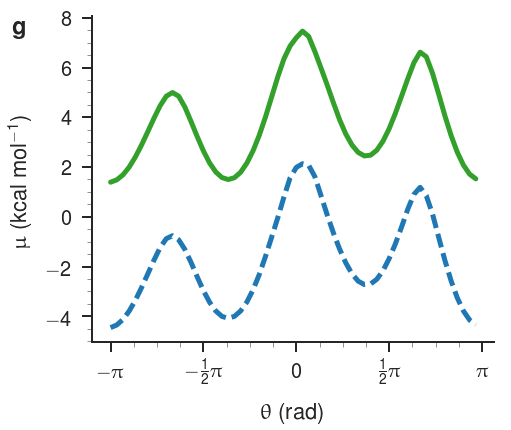

In [126]:
this = Simulation(data_source = 'adk_md_data')
this.name = 'chi1GLU75'
this.cSubstrate = 10**-3 # (M)
this.simulate()
plot_energy(this)
panel_label('g', panel_xoffset=-0.2)
# plot_flux(this)